In [1]:
# generate fake data
import numpy as np
import pandas as pd
size = 1000
df = pd.DataFrame(columns=['uid', 'gender', 'age_group', 'click'])
df['uid'] = np.arange(1000, 2000)
df['gender'] = np.random.choice(('male', 'female'), size=size)
df['age_group'] = np.random.choice(('young', 'middle-age', 'old'), size=size)
df['click'] = np.random.randint(100, size=size)

# manipulate data for middle aged men
df['click'][df['age_group'] == 'middle-age']= df['click'] * (0.7 + np.random.rand())
df['click'][df['gender'] == 'male']= df['click'] * (0.6 + np.random.rand())

C:\Users\ericyliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\ericyliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [2]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_widgets()

C:\Users\ericyliu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# ANOVA with scipy 

import scipy.stats as stats
stats.f_oneway(df['click'][df['age_group'] == 'young'],df['click'][df['age_group'] == 'middle-age'],df['click'][df['age_group'] == 'old'])

F_onewayResult(statistic=16.56988561139306, pvalue=8.333038132819385e-08)

In [4]:
# ANOVA with statsmodels

import statsmodels.api as sm

from statsmodels.formula.api import ols

model = ols('click ~ C(age_group, Sum)', data=df).fit()

table = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame

print(table)

                          sum_sq     df          F        PR(>F)
C(age_group, Sum)   28882.154394    2.0  16.569886  8.333038e-08
Residual           868910.884664  997.0        NaN           NaN


In [5]:
# normality test with Shapiro-Wilk test

import scipy.stats as stats
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9822706580162048, pvalue=1.1241911845871755e-09)

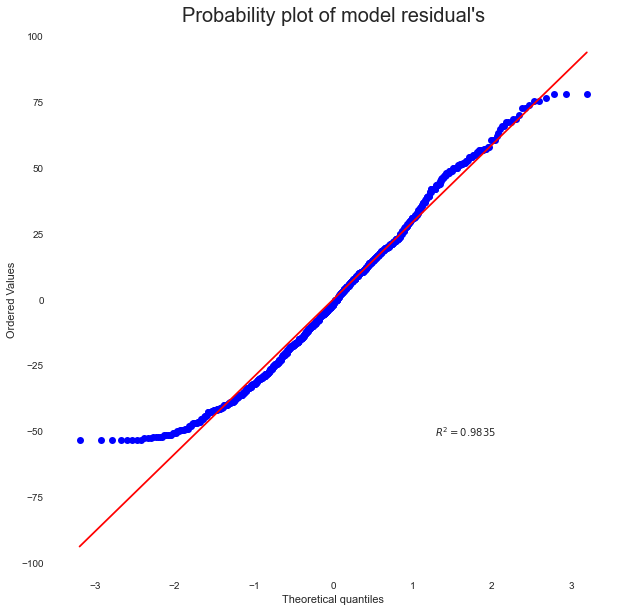

In [6]:
# normality test with probability plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [7]:
# homogeneity of variance with Levene's Test
stats.levene(df['click'][df['age_group'] == 'young'],
             df['click'][df['age_group'] == 'middle-age'],
             df['click'][df['age_group'] == 'old'])

LeveneResult(statistic=55.05251120916256, pvalue=2.096086342732411e-23)

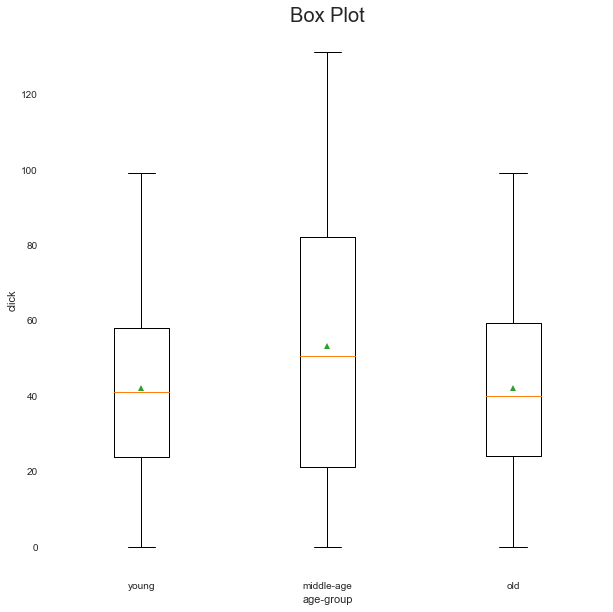

In [8]:
# homogeneity of variance with box plot

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot", fontsize= 20)
ax.set

data = [df['click'][df['age_group'] == 'young'],
        df['click'][df['age_group'] == 'middle-age'],
        df['click'][df['age_group'] == 'old']]

ax.boxplot(data,
           labels= ['young', 'middle-age', 'old'],
           showmeans= True)

plt.xlabel("age-group")
plt.ylabel("click")

plt.show()

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
middle-age    old  14.1462 0.001  8.4479 19.8445   True
middle-age  young   14.547 0.001  8.8943 20.1997   True
       old  young   0.4008   0.9 -5.3914   6.193  False
-------------------------------------------------------


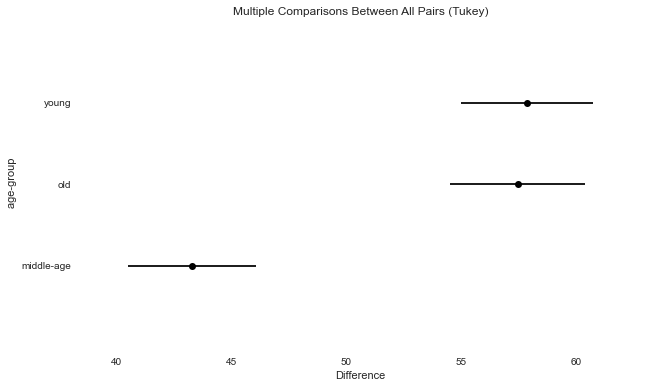

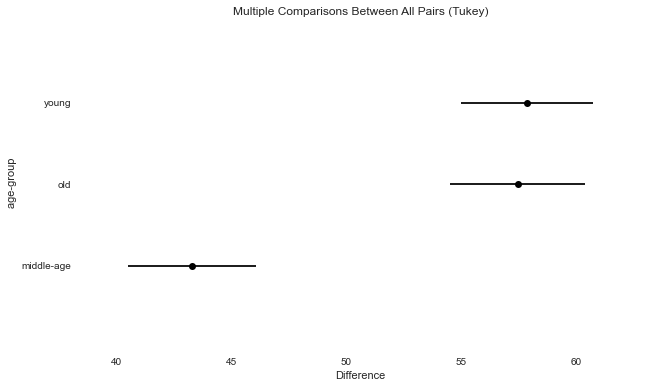

In [33]:
# Pairwise comparison with Tukey HSD

import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['click'], df['age_group'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
# Plot with Tukey HSD
post_hoc_res.plot_simultaneous(ylabel= " age-group", xlabel= "Difference")

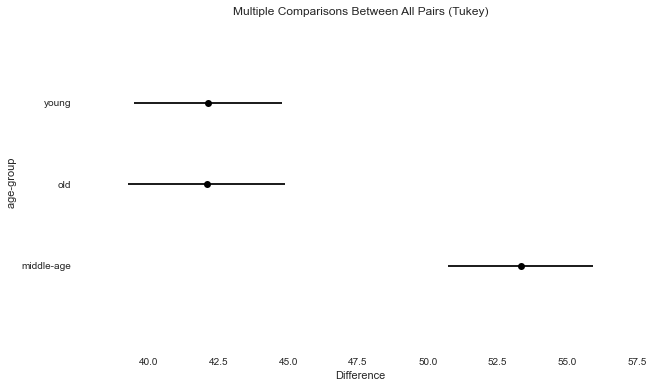

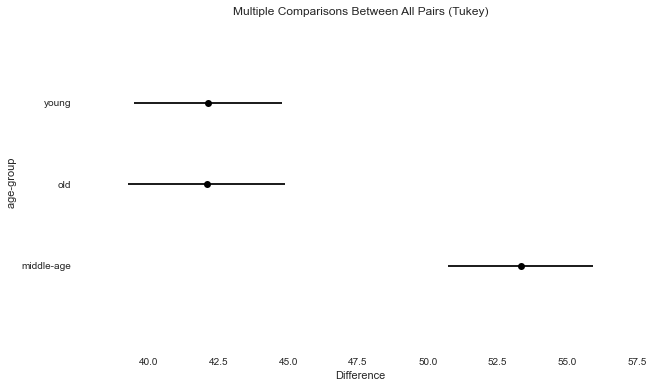